In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db',
                                     mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(affvids_db.all(_limit=10)), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz', num_factors=15)

04/26/2018 14:35:35 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz (zscore=False)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


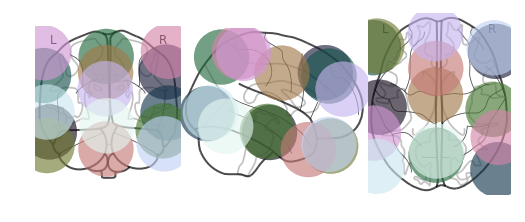

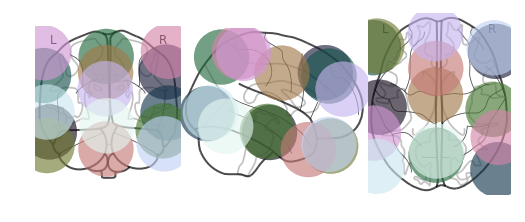

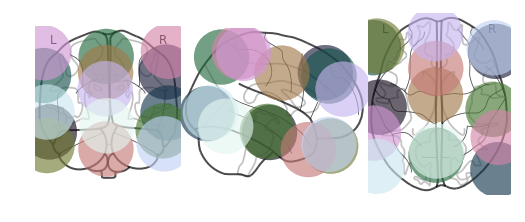

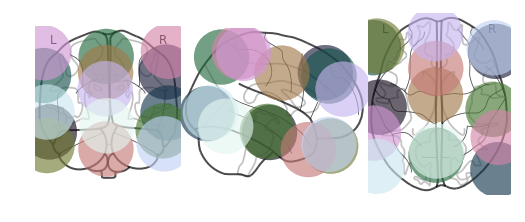

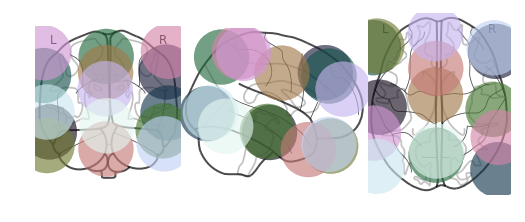

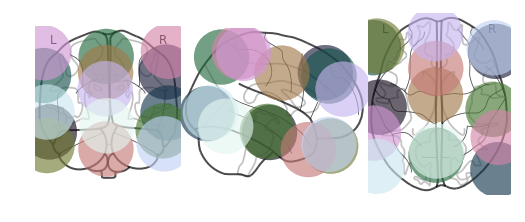

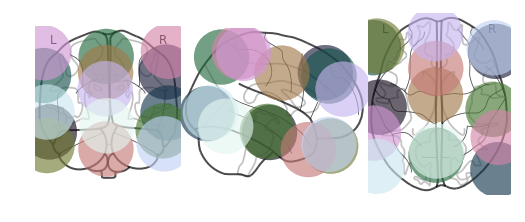

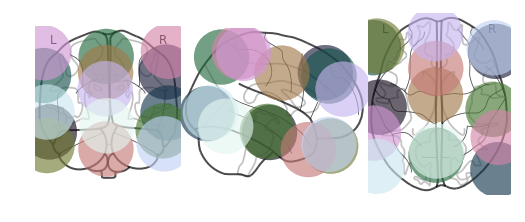

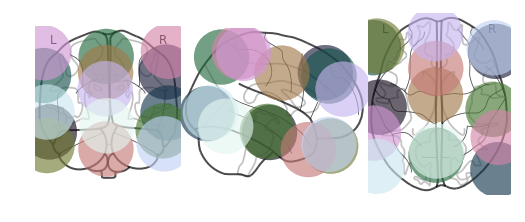

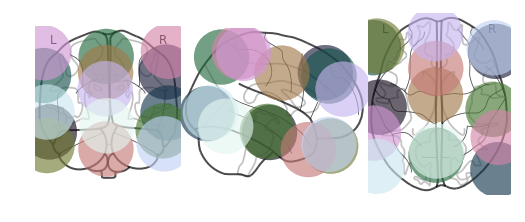

In [6]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(b)

In [7]:
losses = htfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, blocks_batch_size=4)

04/26/2018 14:36:57 [Epoch 1] (4048ms) Posterior free-energy 2.83794662e+14
04/26/2018 14:36:58 [Epoch 2] (774ms) Posterior free-energy 2.82950634e+14
04/26/2018 14:36:59 [Epoch 3] (727ms) Posterior free-energy 2.81851927e+14
04/26/2018 14:37:00 [Epoch 4] (824ms) Posterior free-energy 2.82094559e+14
04/26/2018 14:37:00 [Epoch 5] (804ms) Posterior free-energy 2.80842643e+14
04/26/2018 14:37:01 [Epoch 6] (718ms) Posterior free-energy 2.79954156e+14
04/26/2018 14:37:02 [Epoch 7] (734ms) Posterior free-energy 2.78280863e+14
04/26/2018 14:37:03 [Epoch 8] (733ms) Posterior free-energy 2.77447942e+14
04/26/2018 14:37:03 [Epoch 9] (810ms) Posterior free-energy 2.76088333e+14
04/26/2018 14:37:04 [Epoch 10] (775ms) Posterior free-energy 2.75851657e+14
04/26/2018 14:37:05 [Epoch 11] (742ms) Posterior free-energy 2.73134251e+14
04/26/2018 14:37:06 [Epoch 12] (740ms) Posterior free-energy 2.72504803e+14
04/26/2018 14:37:06 [Epoch 13] (715ms) Posterior free-energy 2.70427264e+14
04/26/2018 14:37:07 

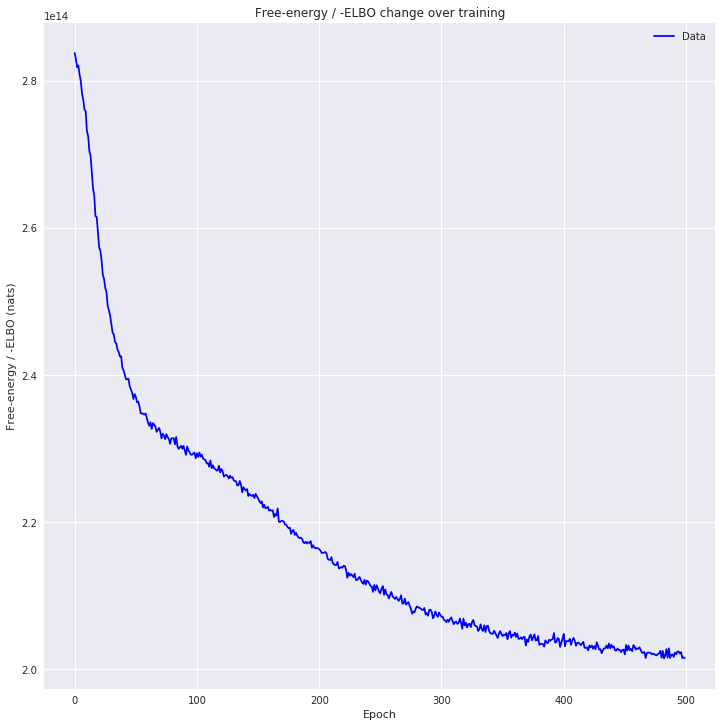

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


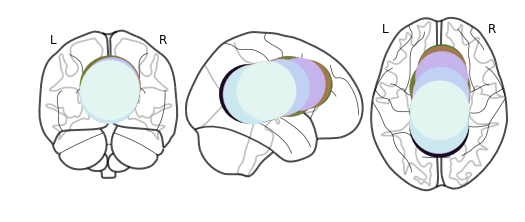

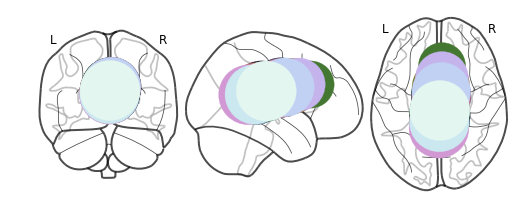

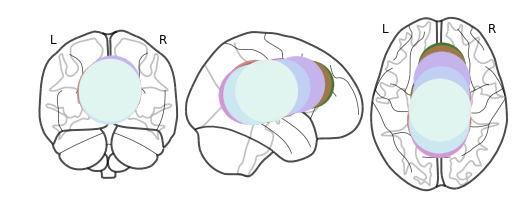

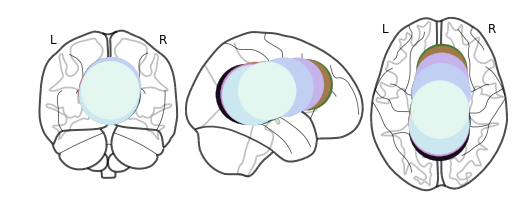

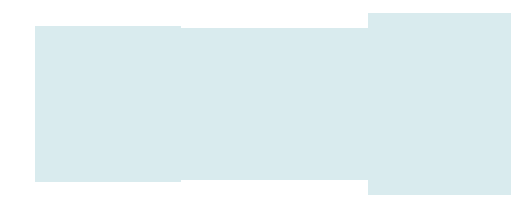

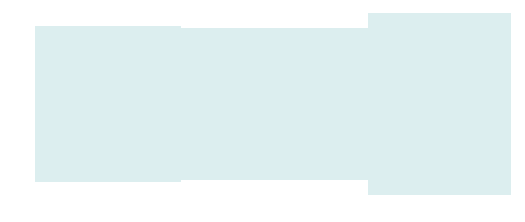

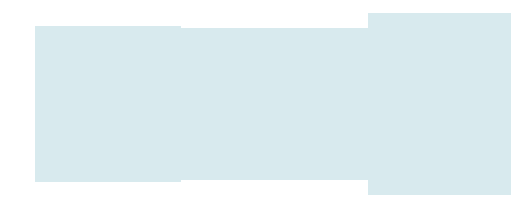

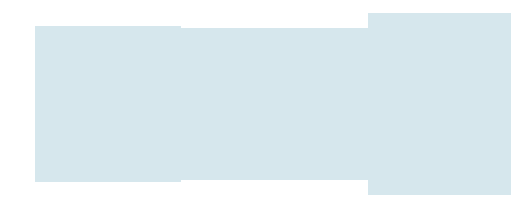

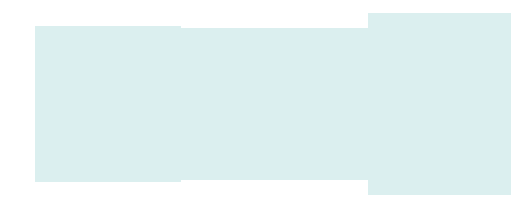

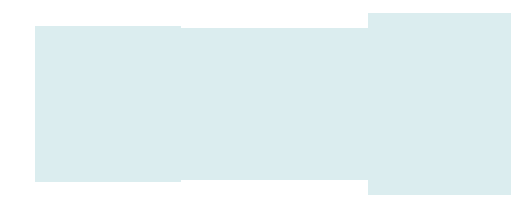

In [9]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(b)